# Analysis Sandbox - NYT

1. Sentiment Analysis
2. Topic Modeling
3. Word Count Studies and Metadata

Model Chomsky Table 2-1.

*Aniket Pant, PHIL 3127*

In [73]:
import pandas as pd
import re
import missingno as msno
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

# Load Data

In [74]:
skripal_df = pd.read_csv("./skripal_export.csv")
iranian_df = pd.read_csv("./scientist_assassination.csv")

In [75]:
skripal_df.head()

,Subject,Business indexing term,Location,People,URL,Title,Author,Publication title,Pages,Publication year,...,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274
0,Infectious diseases;Enrollments;Social distanc...,Unemployment benefits,United States--US; United Kingdom--UK; Minnesota,"Elizabeth II, Queen of Great Britain",https://www.nytimes.com/2020/10/15/nyregion/15...,Coronavirus Update: [Foreign Desk],"Barron, James","New York Times, Late Edition (East Coast); New...",A.4,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Poisoning;Conventions;Biological & chemical we...,NaN,Russia; Germany; United Kingdom--UK,"Navalny, Alexei",https://www.nytimes.com/2020/10/06/world/europ...,"Putin's Leading Rival Was Poisoned, Affirm Wor...","Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",A.15,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Public health;Poisoning;Documentary films;Mili...,NaN,Russia; United Kingdom--UK,"Skripal, Sergei V; Sturgess, Dawn",https://www.nytimes.com/2020/10/01/arts/televi...,Picking Up the Pieces After the Poisonings: [T...,"Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",C.3,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Social networks;Poisoning;Coma;Biological & ch...,NaN,Russia; France; Germany,"Navalny, Alexei",https://www.nytimes.com/2020/09/23/world/europ...,Putin Critic Leaves Hospital After Poisoning: ...,"Eddy, Melissa","New York Times, Late Edition (East Coast); New...",A.10,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Poisoning;Biological & chemical weapons;Murder...,Sanctions;International relations,Russia,"Navalny, Alexei; Putin, Vladimir",https://www.nytimes.com/2020/09/22/opinion/vla...,What Can Mr. Putin Get Away With?: [Editorial],NaN,"New York Times, Late Edition (East Coast); New...",A.26,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
iranian_df.head()

,Subject,Location,People,Title,Author,Publication title,Pages,Publication year,Publication date,column,...,Document type,ProQuest document ID,Document URL,Copyright,Last updated,Database,fullText,Company / organization,Dateline,Dataset
0,Diplomacy;Foreign policy;International relatio...,Israel; Iran; United States--US,"Bush, George W; Kerry, John F; Obama, Barack","Diplomacy and Sanctions, Yes. Left Unspoken on...","Sanger, David E","New York Times, Late Edition (East Coast); New...",A.8,2016.0,20-Jan-16,News Analysis,...,Commentary,1.758057e+09,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 20, 2016",11/22/2017,3 databasesView listGlobal NewsstreamProQuest ...,WASHINGTON -- President Obama and Secretary of...,NaN,NaN,Scientist Assassination
1,Espionage;Assassinations & assassination attem...,Israel; Iran,"Melman, Yossi; Raviv, Dan",Tehran Abuzz As Book Says Israel Killed 5 Scie...,"Afkhami, Artin","New York Times, Late Edition (East Coast); New...",A.8,2012.0,12-Jul-12,NaN,...,News,1.024462e+09,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jul 12, 2012",11/19/2017,3 databasesView listGlobal NewsstreamProQuest ...,The latest literary sensation in Tehran is a t...,CBS Broadcasting Inc,NaN,Scientist Assassination
2,Nuclear weapons;Sanctions;International relati...,United States--US; Israel; Iran,"Dempsey, Martin E",U.S. General Visits Israel For Discussions on ...,"Bronner, Ethan","New York Times, Late Edition (East Coast); New...",A.6,2012.0,20-Jan-12,NaN,...,News,9.168194e+08,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 20, 2012",11/18/2017,3 databasesView listGlobal NewsstreamProQuest ...,"JERUSALEM -- Gen. Martin E. Dempsey, chairman ...",Joint Chiefs of Staff,NaN,Scientist Assassination
3,Military exercises;Missile defense;Internation...,United States--US; Israel; Iran,NaN,"Military Drill With the U.S. Is Postponed, Isr...","Kershner, Isabel","New York Times, Late Edition (East Coast); New...",A.9,2012.0,17-Jan-12,NaN,...,NEWSPAPER,9.162812e+08,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 17, 2012",11/18/2017,3 databasesView listGlobal NewsstreamProQuest ...,NaN,NaN,NaN,Scientist Assassination
4,Assassinations & assassination attempts;Scient...,United States--US; Iran,NaN,Iran Signals Revenge Over Killing Of Scientist...,"Gladstone, Rick","New York Times, Late Edition (East Coast); New...",A.10,2012.0,13-Jan-12,NaN,...,News,9.156441e+08,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 13, 2012",11/18/2017,3 databasesView listGlobal NewsstreamProQuest ...,Error encountered in scraping fullText.,NaN,NaN,Scientist Assassination


In [77]:
df = pd.concat([skripal_df, iranian_df])

In [78]:
df.tail()

,Subject,Business indexing term,Location,People,URL,Title,Author,Publication title,Pages,Publication year,...,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274
14,NaN,NaN,Iran,NaN,NaN,Iran: Arrests in Attacks on Nuclear Scientists...,"Worth, Robert F","New York Times, Late Edition (East Coast); New...",A.8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Meetings;International relations,NaN,Iran,"Ahmadinejad, Mahmoud; Jalili, Saeed",NaN,WORLD BRIEFING MIDDLE EAST; Iran: Date Set for...,WILLIAM YONG and J. DAVID GOODMAN,"New York Times, Late Edition (East Coast); New...",A.8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Nuclear weapons;Sanctions;Assassinations & ass...,NaN,United States--US; Israel; Iran,"Ahmadinejad, Mahmoud",NaN,Bombings Hit Atomic Experts In Iran Streets: [...,WILLIAM YONG and ROBERT F. WORTH,"New York Times, Late Edition (East Coast); New...",A.1,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Demonstrations & protests;Capital punishment;P...,NaN,United States--US; Teheran Iran; Iran,NaN,NaN,Motorcycle Bomb Kills Iranian Physics Professo...,"Cowell, Alan","New York Times, Late Edition (East Coast); New...",A.12,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Covert operations;Nuclear weapons;Military air...,NaN,Iran; United States--US; Israel,"Bush, George W",NaN,U.S. Rejected Aid For Israeli Raid On Nuclear ...,"Sanger, David E","New York Times, Late Edition (East Coast); New...",A.1,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df.columns[0:34]

Index(['Subject', 'Business indexing term', 'Location', 'People', 'URL',
       'Title', 'Author', 'Publication title', 'Pages', 'Publication year',
       'Publication date', 'Section', 'Publisher', 'Place of publication',
       'Country of publication', 'Publication subject', 'ISSN', 'Source type',
       'Language of publication', 'Document type', 'ProQuest document ID',
       'Document URL', 'Copyright', 'Last updated', 'Database', 'fullText',
       'Company / organization', 'column', 'Identifier / keyword', 'Dateline',
       'CODEN', 'Company', 'Number of pages', 'Dataset'],
      dtype='object')

<AxesSubplot:>

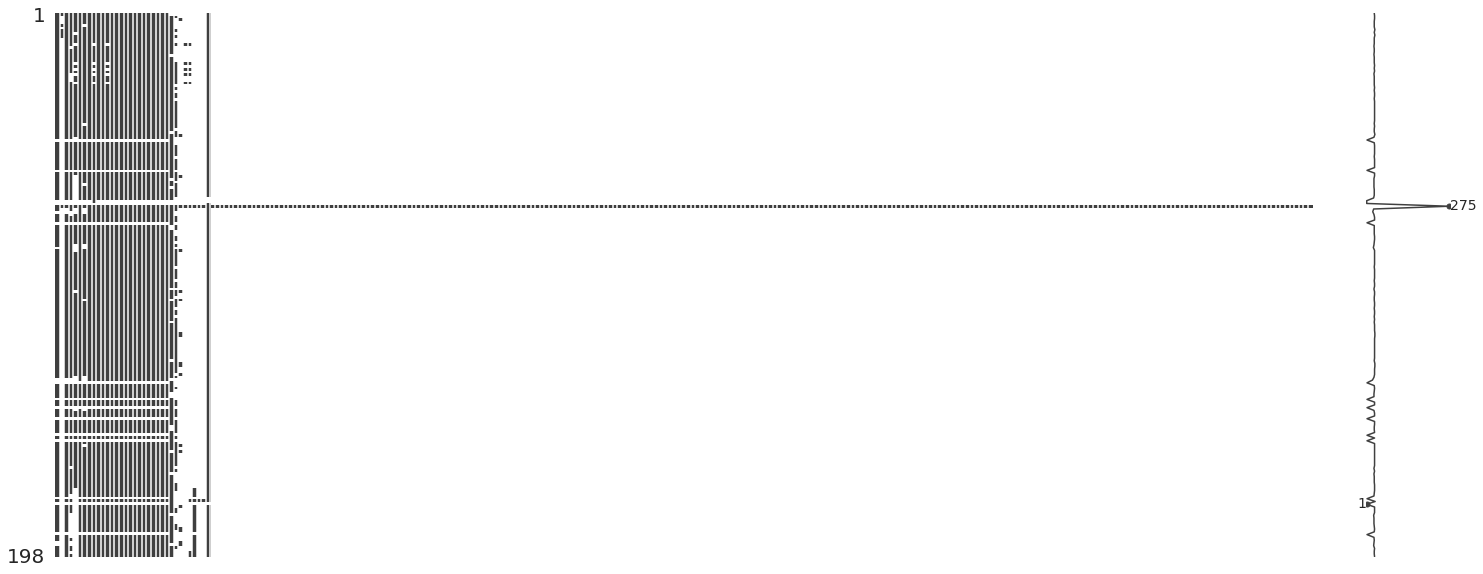

In [80]:
df = df.dropna(axis=1, how='all')
msno.matrix(df)

In [81]:
df = df[['fullText', 'Dataset']]
df = df.dropna()

In [82]:
df = df[df.fullText != "Error encountered in scraping fullText."]

In [83]:
df.head()

,fullText,Dataset
1,The Organization for the Prohibition of Chemic...,Skripal
2,A new AMC show dramatizes the 2018 poisoning o...,Skripal
3,Doctors treating Aleksei Navalny said he had b...,Skripal
4,Why has the poisoning of Alexei Navalny been m...,Skripal
5,The opposition leader jokes that he has recove...,Skripal


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 18
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullText  146 non-null    object
 1   Dataset   146 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


# Word Count

In [85]:
p = r'\w+'
df['wordCount'] = df['fullText'].apply(lambda x: len(re.findall(p, x)))

In [86]:
df.head()

,fullText,Dataset,wordCount
1,The Organization for the Prohibition of Chemic...,Skripal,1189
2,A new AMC show dramatizes the 2018 poisoning o...,Skripal,1230
3,Doctors treating Aleksei Navalny said he had b...,Skripal,851
4,Why has the poisoning of Alexei Navalny been m...,Skripal,866
5,The opposition leader jokes that he has recove...,Skripal,740


In [87]:
df.isnull

<bound method DataFrame.isnull of                                              fullText  \
1   The Organization for the Prohibition of Chemic...   
2   A new AMC show dramatizes the 2018 poisoning o...   
3   Doctors treating Aleksei Navalny said he had b...   
4   Why has the poisoning of Alexei Navalny been m...   
5   The opposition leader jokes that he has recove...   
..                                                ...   
13  Israel's minister of strategic affairs said We...   
15  TEHRAN -- Iran and the European Union agreed T...   
16  TEHRAN -- Unidentified assailants riding motor...   
17  A remote-controlled bomb attached to a motorcy...   
18  President Bush deflected a secret request by I...   

                    Dataset  wordCount  
1                   Skripal       1189  
2                   Skripal       1230  
3                   Skripal        851  
4                   Skripal        866  
5                   Skripal        740  
..                      ...        

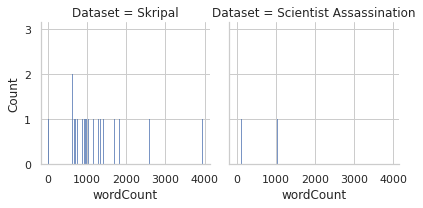

In [88]:
sns.displot(
    df, x="wordCount", col="Dataset",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<AxesSubplot:xlabel='Dataset', ylabel='wordCount'>

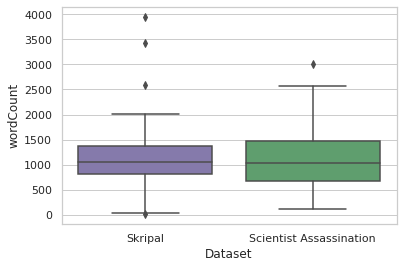

In [90]:
sns.boxplot(x="Dataset", y="wordCount", palette=["m", "g"],
            data=df)